In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from depth_to_normals_tests import *
from img_utils import show_normals_components

# import cv2 as cv
# from scene_info import read_cameras, CameraEntry
# from dataclasses import dataclass
# from depth_to_normals import compute_normals_simple_diff_convolution_simple


In [7]:
def test_depth_to_normals(mask, old_implementation=False):

    planes_coeffs = np.array([
        [0, 0, 1, -1],
        [0, 0, 1, -100],
        [1, 0, 1, -1],
#         [0, 1, 1, -1],
#         [1, 2, 2, -1],
#         [1, 3, 3, -1],
    ])

    cameras = read_cameras("scene1")
    first_camera = next(iter(cameras.values()))

    for plane in planes_coeffs:

        plane = -plane

        exact = plane[:3].copy()
        exact = exact / np.linalg.norm(exact)
        print("\n\n\n\n\nTesting synthetic depth map for plane coeffs (ax + by + cz + d = 0): {}".format(exact))

        dsd = DepthSyntheticData(plane=plane, camera=first_camera, file_dir_and_name=get_file_dir_and_name(plane))
        depth_map_of_plane(dsd, False)

        
        depth, normals, clustered_normals, normal_indices = compute_normals_simple_diff_convolution_simple(dsd.camera,
                                                           dsd.file_dir_and_name[0],
                                                           dsd.file_dir_and_name[1],
                                                           save=True,
                                                           output_directory=dsd.file_dir_and_name[0],
                                                           override_mask=mask,
                                                           old_implementation=old_implementation)
        normals_diff = normals - dsd.plane[:3]
        show_normals_components(normals_diff, "difference from exact result", (30.0, 20.0))

        if len(normals.shape) == 5:
            normals = normals.squeeze(dim=0).squeeze(dim=0)

        maxima = np.max(normals.numpy()[10:-10, 10:-10], axis=(0, 1))
        minima = np.min(normals.numpy()[10:-10, 10:-10], axis=(0, 1))
        max_dev = maxima - exact
        min_dev = minima - exact

        print("exact normal of the plane (x, y, y): {}".format(exact))
        print("normal component maxima (x, y, y): {}".format(maxima))
        print("normal component minima (x, y, y): {}".format(minima))
        print("difference of normal component maxima from the exact values (x, y, y): {}".format(max_dev))
        print("difference of normal component minima from the exact values (x, y, y): {}".format(min_dev))

        # assert np.all(normal_indices == 0.0)
        # assert normals.shape[0] == 1
        # assert np.equal(normals[0], dsd.plane[:3])







Testing synthetic depth map for plane coeffs (ax + by + cz + d = 0): [ 0.  0. -1.]
Creating dir (if not exists already): work/tests/


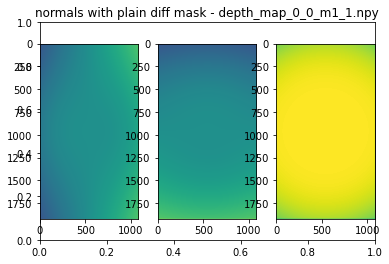

clustering normals starting
clustering normals finished. It took 0.66703200340271


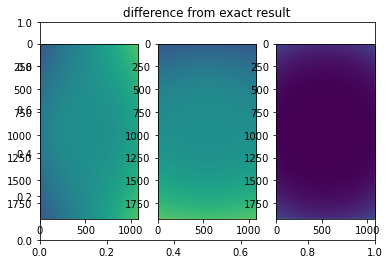

exact normal of the plane (x, y, y): [ 0.  0. -1.]
normal component maxima (x, y, y): [ 0.0852523   0.1528876  -0.98449953]
normal component minima (x, y, y): [-0.08544922 -0.15316368 -1.        ]
difference of normal component maxima from the exact values (x, y, y): [0.0852523  0.1528876  0.01550047]
difference of normal component minima from the exact values (x, y, y): [-0.08544922 -0.15316368  0.        ]





Testing synthetic depth map for plane coeffs (ax + by + cz + d = 0): [ 0.  0. -1.]
Creating dir (if not exists already): work/tests/


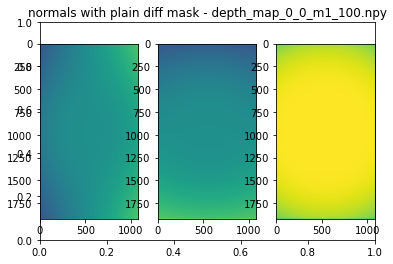

clustering normals starting
clustering normals finished. It took 0.6732380390167236


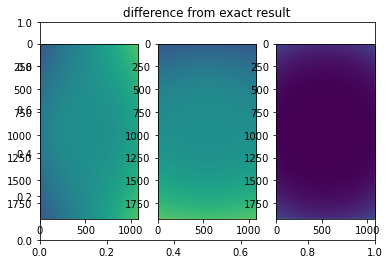

exact normal of the plane (x, y, y): [ 0.  0. -1.]
normal component maxima (x, y, y): [ 0.0852523   0.1528876  -0.98449953]
normal component minima (x, y, y): [-0.08544922 -0.15316368 -1.        ]
difference of normal component maxima from the exact values (x, y, y): [0.0852523  0.1528876  0.01550047]
difference of normal component minima from the exact values (x, y, y): [-0.08544922 -0.15316368  0.        ]





Testing synthetic depth map for plane coeffs (ax + by + cz + d = 0): [-0.70710678  0.         -0.70710678]
Creating dir (if not exists already): work/tests/


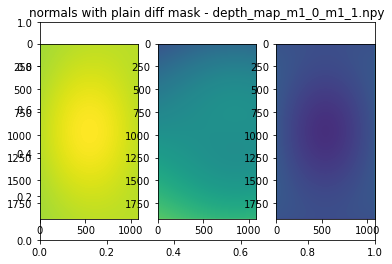

clustering normals starting
clustering normals finished. It took 0.6746492385864258


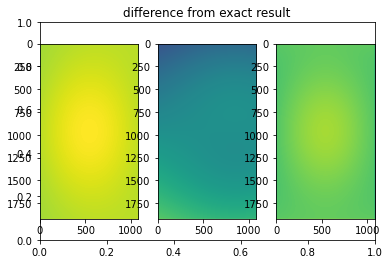

exact normal of the plane (x, y, y): [-0.70710678  0.         -0.70710678]
normal component maxima (x, y, y): [ 0.70710701  0.13997966 -0.70710656]
normal component minima (x, y, y): [ 0.6622082  -0.14017272 -0.74196973]
difference of normal component maxima from the exact values (x, y, y): [1.41421379e+00 1.39979655e-01 2.25811096e-07]
difference of normal component minima from the exact values (x, y, y): [ 1.36931498 -0.14017272 -0.03486295]


In [8]:
mask = torch.tensor([[0.5, 0, -0.5]]).float()
test_depth_to_normals(mask, False)






Testing synthetic depth map for plane coeffs (ax + by + cz + d = 0): [ 0.  0. -1.]
Creating dir (if not exists already): work/tests/


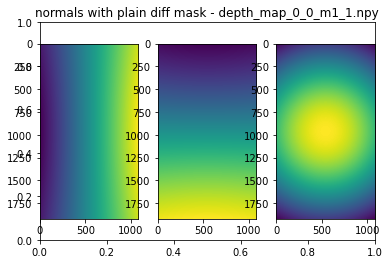

clustering normals starting
clustering normals finished. It took 0.7206950187683105


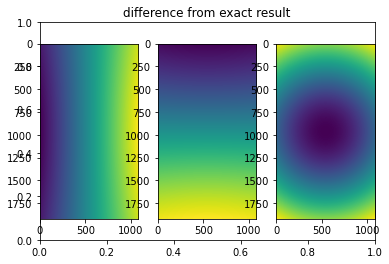

exact normal of the plane (x, y, y): [ 0.  0. -1.]
normal component maxima (x, y, y): [ 0.01095839  0.01760659 -0.99981218]
normal component minima (x, y, y): [-0.01099501 -0.01763319 -1.        ]
difference of normal component maxima from the exact values (x, y, y): [0.01095839 0.01760659 0.00018782]
difference of normal component minima from the exact values (x, y, y): [-1.09950082e-02 -1.76331855e-02  1.18275834e-10]





Testing synthetic depth map for plane coeffs (ax + by + cz + d = 0): [ 0.  0. -1.]
Creating dir (if not exists already): work/tests/


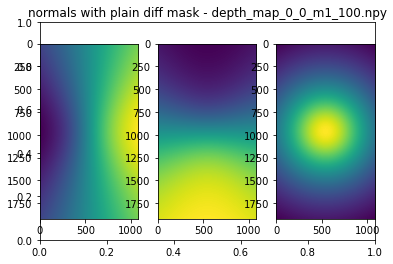

clustering normals starting
clustering normals finished. It took 0.6905899047851562


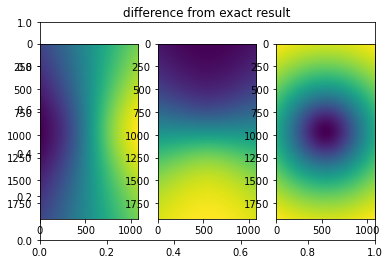

exact normal of the plane (x, y, y): [ 0.  0. -1.]
normal component maxima (x, y, y): [ 0.73868973  0.8695688  -0.45846813]
normal component minima (x, y, y): [-0.73980815 -0.86988861 -0.99999882]
difference of normal component maxima from the exact values (x, y, y): [0.73868973 0.8695688  0.54153187]
difference of normal component minima from the exact values (x, y, y): [-7.39808147e-01 -8.69888610e-01  1.18275689e-06]





Testing synthetic depth map for plane coeffs (ax + by + cz + d = 0): [-0.70710678  0.         -0.70710678]
Creating dir (if not exists already): work/tests/


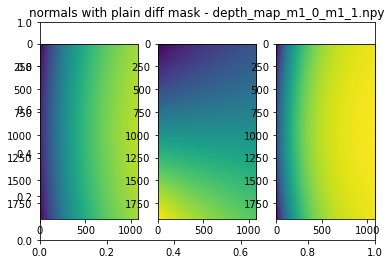

clustering normals starting
clustering normals finished. It took 0.6631360054016113


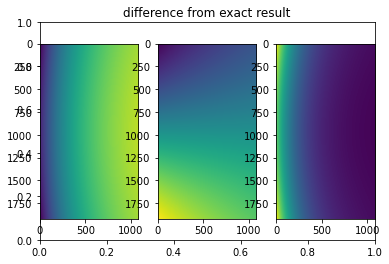

exact normal of the plane (x, y, y): [-0.70710678  0.         -0.70710678]
normal component maxima (x, y, y): [-0.01129059  0.02577058 -0.99352545]
normal component minima (x, y, y): [-0.11063897 -0.02581064 -0.99993626]
difference of normal component maxima from the exact values (x, y, y): [ 0.69581619  0.02577058 -0.28641867]
difference of normal component minima from the exact values (x, y, y): [ 0.59646781 -0.02581064 -0.29282948]


In [5]:
mask = None
test_depth_to_normals(mask, True)






Testing synthetic depth map for plane coeffs (ax + by + cz + d = 0): [ 0.  0. -1.]
Creating dir (if not exists already): work/tests/


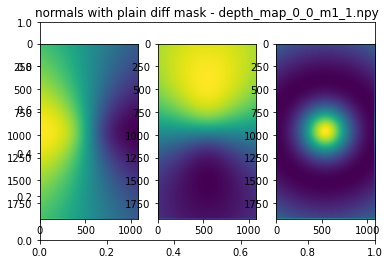

clustering normals starting
clustering normals finished. It took 0.6927218437194824


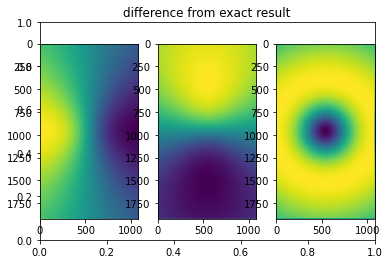

exact normal of the plane (x, y, y): [ 0.  0. -1.]
normal component maxima (x, y, y): [ 0.64866305  0.6495095  -0.76035345]
normal component minima (x, y, y): [-0.6486122 -0.6495095 -1.       ]
difference of normal component maxima from the exact values (x, y, y): [0.64866305 0.6495095  0.23964655]
difference of normal component minima from the exact values (x, y, y): [-0.6486122 -0.6495095  0.       ]





Testing synthetic depth map for plane coeffs (ax + by + cz + d = 0): [ 0.  0. -1.]
Creating dir (if not exists already): work/tests/


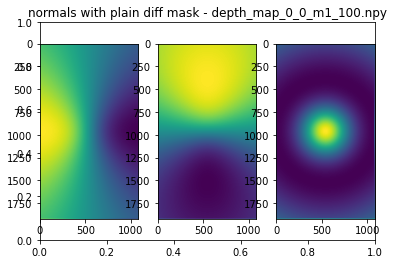

clustering normals starting
clustering normals finished. It took 0.6835017204284668


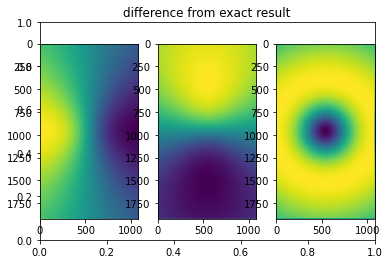

exact normal of the plane (x, y, y): [ 0.  0. -1.]
normal component maxima (x, y, y): [ 0.64866305  0.6495095  -0.76035345]
normal component minima (x, y, y): [-0.6486122 -0.6495095 -1.       ]
difference of normal component maxima from the exact values (x, y, y): [0.64866305 0.6495095  0.23964655]
difference of normal component minima from the exact values (x, y, y): [-0.6486122 -0.6495095  0.       ]





Testing synthetic depth map for plane coeffs (ax + by + cz + d = 0): [-0.70710678  0.         -0.70710678]
Creating dir (if not exists already): work/tests/


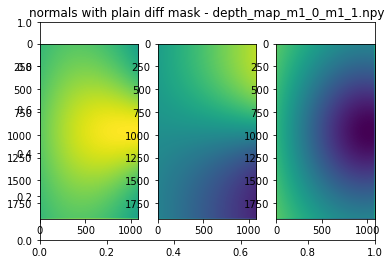

clustering normals starting
clustering normals finished. It took 0.6725051403045654


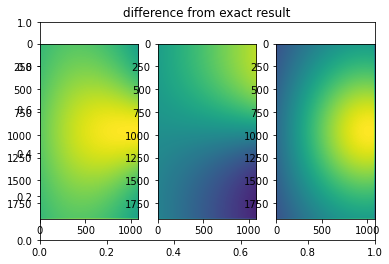

exact normal of the plane (x, y, y): [-0.70710678  0.         -0.70710678]
normal component maxima (x, y, y): [ 0.99813448  0.44760356 -0.06105381]
normal component minima (x, y, y): [ 0.84118883 -0.44760356 -0.46962218]
difference of normal component maxima from the exact values (x, y, y): [1.70524126 0.44760356 0.64605297]
difference of normal component minima from the exact values (x, y, y): [ 1.54829561 -0.44760356  0.23748461]


In [10]:
mask = torch.tensor([[0.5, 0.5, 0.5, 0.5, 0.5,
                          0.5, 0.5, 0.5, 0.5, 0.5,
                          0,
                         -0.5, -0.5, -0.5, -0.5, -0.5,
                         -0.5, -0.5, -0.5, -0.5, -0.5,
                         ]]).float() / 10
test_depth_to_normals(mask, False)